In [1]:
# -*- coding: utf-8 -*-
"""
Test Quantum Process Tomography methods
"""

import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

import channels as ch
import tomography as tmg


# prepare channel
p = 0.2
channel = lambda rho: ch.depolarize_channel(rho, p)
C_true = ch.channel_to_choi(channel)


# Experimental Setup. We will measure and prepare states in tetrahedron axis
PREPARE_CASE = 'tetr'
MEASURE_CASE = 'tetr'


# Number of qubit copies for each measurement axis
N_list = [100, 200, 500, 700, 1000, 1500, 2000, 5000, 7000, 1e4]

PROTOCOL = np.matrix(tmg.protocol_QPT(prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE))


"""
How perfomance of LI method depends on number of copies of initial states
"""


# arrays of different distances for average values storage
tr_dist_val_av  = []
hs_dist_val_av  = []
fro_dist_val_av = []

tr_dist_val_pr_av  = []
hs_dist_val_pr_av  = []
fro_dist_val_pr_av = []

rep_numb = 50 # number of repetitions of experiment (for smooth results)


for i in range(rep_numb):
    C_est_list = []
    for n in N_list:

        # collect experimental data
        frequencies = tmg.measurements(channel, prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE, N = n).reshape(-1,1)

        # recover C_est
        C_est_LI = ((PROTOCOL.H @ PROTOCOL).I @ PROTOCOL.H) @ frequencies
        C_est_LI = C_est_LI.reshape(4,4)
        C_est_list.append(C_est_LI)


    # arrays of different distances
    tr_dist_val = []
    hs_dist_val = []
    fro_dist_val = []

    tr_dist_val_pr = []
    hs_dist_val_pr = []
    fro_dist_val_pr = []

    for C in C_est_list:
        fro_dist_val.append(LA.norm(C - C_true))
        fro_dist_val_pr.append(LA.norm(tmg.CPTP_proj(C) - C_true))
        hs_dist_val.append(tmg.hs_dist(C, C_true))
        hs_dist_val_pr.append(tmg.hs_dist(tmg.CPTP_proj(C), C_true))
        tr_dist_val.append(tmg.tr_dist(C, C_true))
        tr_dist_val_pr.append(tmg.tr_dist(tmg.CPTP_proj(C), C_true))

    fro_dist_val_av.append(fro_dist_val)
    fro_dist_val_pr_av.append(fro_dist_val_pr)
    hs_dist_val_av.append(hs_dist_val)
    hs_dist_val_pr_av.append(hs_dist_val_pr)
    tr_dist_val_av.append(tr_dist_val)
    tr_dist_val_pr_av.append(tr_dist_val_pr)

# convert lists in arrays
tr_dist_val_av  = np.array(tr_dist_val_av)
hs_dist_val_av  = np.array(hs_dist_val_av)
fro_dist_val_av = np.array(fro_dist_val_av)

tr_dist_val_pr_av  = np.array(tr_dist_val_pr_av)
tr_dist_val_pr_av  = np.array(tr_dist_val_pr_av)
fro_dist_val_pr_av = np.array(fro_dist_val_pr_av)


# compute mean values for every array
tr_dist_val_av  = np.mean(tr_dist_val_av, axis = 0)
hs_dist_val_av  = np.mean(hs_dist_val_av, axis = 0)
fro_dist_val_av = np.mean(fro_dist_val_av, axis = 0)

tr_dist_val_pr_av = np.mean(tr_dist_val_pr_av,  axis=0)
hs_dist_val_pr_av = np.mean(hs_dist_val_pr_av,  axis=0)
fro_dist_val_pr_av = np.mean(fro_dist_val_pr_av, axis=0)




# # Plot the perfomance of Pseudo-Inverse matrix method (without projection on CPTP set)

# plt.figure(figsize=(8,6))
# plt.semilogx(N_list, tr_dist_val_av,  label= 'Trace distance',           marker='o')
# plt.semilogx(N_list, hs_dist_val_av,  label= 'Hilbert Schmidt distance', marker= '>')
# plt.semilogx(N_list, fro_dist_val_av, label= 'Frobenius norm',           marker='x')

# plt.xlabel('Number of copies')
# plt.ylabel('Error')
# plt.title('Perfomance of Pseudo-Inverse Matrix Method')
# plt.legend()
# plt.show()


#%%

# arrays of different distances for average values storage
ml_tr_dist_val_av  = []
ml_hs_dist_val_av  = []
ml_fro_dist_val_av = []

ml_tr_dist_val_pr_av  = []
ml_hs_dist_val_pr_av  = []
ml_fro_dist_val_pr_av = []


for i in range(rep_numb):
    C_est_list = []
    for n in N_list:

        # collect experimental data
        frequencies = tmg.measurements(channel, prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE, N = n).reshape(-1,1)

        # recover C_est
        C_est_ML = tmg.grad_descent(frequencies.reshape(-1,1), PROTOCOL)[-1]
        C_est_ML = C_est_ML.reshape(4,4)
        C_est_list.append(C_est_ML)


    # arrays of different distances
    ml_tr_dist_val = []
    ml_hs_dist_val = []
    ml_fro_dist_val = []

    ml_tr_dist_val_pr = []
    ml_hs_dist_val_pr = []
    ml_fro_dist_val_pr = []

    for C in C_est_list:
        ml_fro_dist_val.append(LA.norm(C - C_true))
        ml_fro_dist_val_pr.append(LA.norm(tmg.CPTP_proj(C) - C_true))
        ml_hs_dist_val.append(tmg.hs_dist(C, C_true))
        ml_hs_dist_val_pr.append(tmg.hs_dist(tmg.CPTP_proj(C), C_true))
        ml_tr_dist_val.append(tmg.tr_dist(C, C_true))
        ml_tr_dist_val_pr.append(tmg.tr_dist(tmg.CPTP_proj(C), C_true))

    ml_fro_dist_val_av.append(ml_fro_dist_val)
    ml_fro_dist_val_pr_av.append(ml_fro_dist_val_pr)
    ml_hs_dist_val_av.append(ml_hs_dist_val)
    ml_hs_dist_val_pr_av.append(ml_hs_dist_val_pr)
    ml_tr_dist_val_av.append(ml_tr_dist_val)
    ml_tr_dist_val_pr_av.append(ml_tr_dist_val_pr)

# convert lists in arrays
ml_tr_dist_val_av  = np.array(ml_tr_dist_val_av)
ml_hs_dist_val_av  = np.array(ml_hs_dist_val_av)
ml_fro_dist_val_av = np.array(ml_fro_dist_val_av)

ml_tr_dist_val_pr_av  = np.array(ml_tr_dist_val_pr_av)
ml_tr_dist_val_pr_av  = np.array(ml_tr_dist_val_pr_av)
ml_fro_dist_val_pr_av = np.array(ml_fro_dist_val_pr_av)


# compute mean values for every array
ml_tr_dist_val_av  = np.mean(ml_tr_dist_val_av, axis = 0)
ml_hs_dist_val_av  = np.mean(ml_hs_dist_val_av, axis = 0)
ml_fro_dist_val_av = np.mean(ml_fro_dist_val_av, axis = 0)

ml_tr_dist_val_pr_av  = np.mean(ml_tr_dist_val_pr_av,  axis=0)
ml_hs_dist_val_pr_av  = np.mean(ml_hs_dist_val_pr_av,  axis=0)
ml_fro_dist_val_pr_av = np.mean(ml_fro_dist_val_pr_av, axis=0)

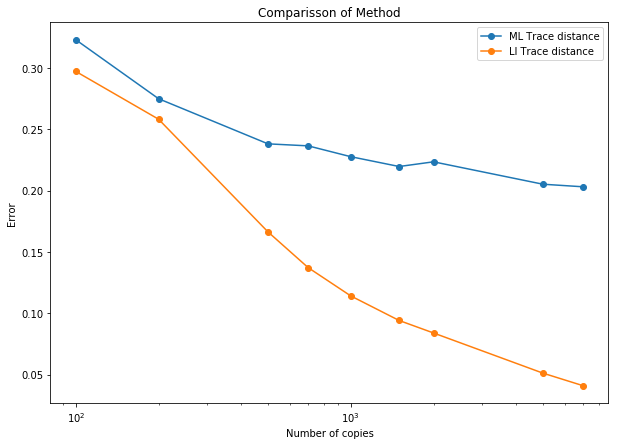

In [6]:
plt.figure(figsize=(10,7))
plt.xlabel('Number of copies')
plt.ylabel('Error')
plt.title('Comparisson of Method')
plt.semilogx(N_list, ml_tr_dist_val_pr_av,  label= 'ML Trace distance',           marker='o')
plt.semilogx(N_list, tr_dist_val_pr_av,  label= 'LI Trace distance',           marker='o')
plt.legend()

plt.show()

In [5]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt

import channels as ch
import tomography as tmg


# prepare channel
p = 0.
# channel = lambda rho: ch.depolarize_channel(rho, p)
channel = lambda rho: ch.gate_action(rho, 'X')
C_true = ch.channel_to_choi(channel)


# Experimental Setup. We will measure and prepare states in tetrahedron axis
PREPARE_CASE = 'tetr'
MEASURE_CASE = 'tetr'

PROTOCOL = np.matrix(tmg.protocol_QPT(prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE))
n = 1000

# collect experimental data
frequencies = tmg.measurements(channel, prepare_case=PREPARE_CASE, measure_case=MEASURE_CASE, N = n).reshape(-1,1)

# recover C_est via linear inversion
C_est_LI = ((PROTOCOL.H @ PROTOCOL).I @ PROTOCOL.H) @ frequencies
C_est_LI = tmg.CPTP_proj(C_est_LI).reshape(4,4)
C_est_LI = C_est_LI.reshape(4,4)

C_0 = C_est_LI
# recover C_est via gradient descend
C_list = tmg.grad_descent(frequencies.reshape(-1,1), PROTOCOL, C_0)
C_est_ML = C_list[-1]
C_est_ML = C_est_ML.reshape(4,4)

End of algorithm. cost =  [[4.99970958]]


In [6]:
print('True channel:\n', np.around(C_true, decimals=3),   '\n')
print('LI recovery:\n',  np.around(C_est_LI, decimals=3), '\n')
print('ML recovery:\n',  np.around(C_est_ML, decimals=3), '\n')

print(LA.norm(C_true - C_est_LI))
print(LA.norm(C_true - C_est_ML))

True channel:
 [[0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]] 

LI recovery:
 [[ 0.007+0.j    -0.009-0.002j  0.013-0.015j  0.004-0.006j]
 [-0.009+0.002j  0.993+0.j     0.948+0.016j -0.013+0.015j]
 [ 0.013+0.015j  0.948-0.016j  0.993+0.j     0.009+0.002j]
 [ 0.004+0.006j -0.013-0.015j  0.009-0.002j  0.007+0.j   ]] 

ML recovery:
 [[ 0.007+0.j    -0.009-0.002j  0.013-0.015j  0.004-0.006j]
 [-0.009+0.002j  0.993+0.j     0.948+0.016j -0.013+0.015j]
 [ 0.013+0.015j  0.948-0.016j  0.993+0.j     0.009+0.002j]
 [ 0.004+0.006j -0.013-0.015j  0.009-0.002j  0.007+0.j   ]] 

0.09110969000898714
0.09110592402063432


In [7]:
%matplotlib inline
import seaborn as sns

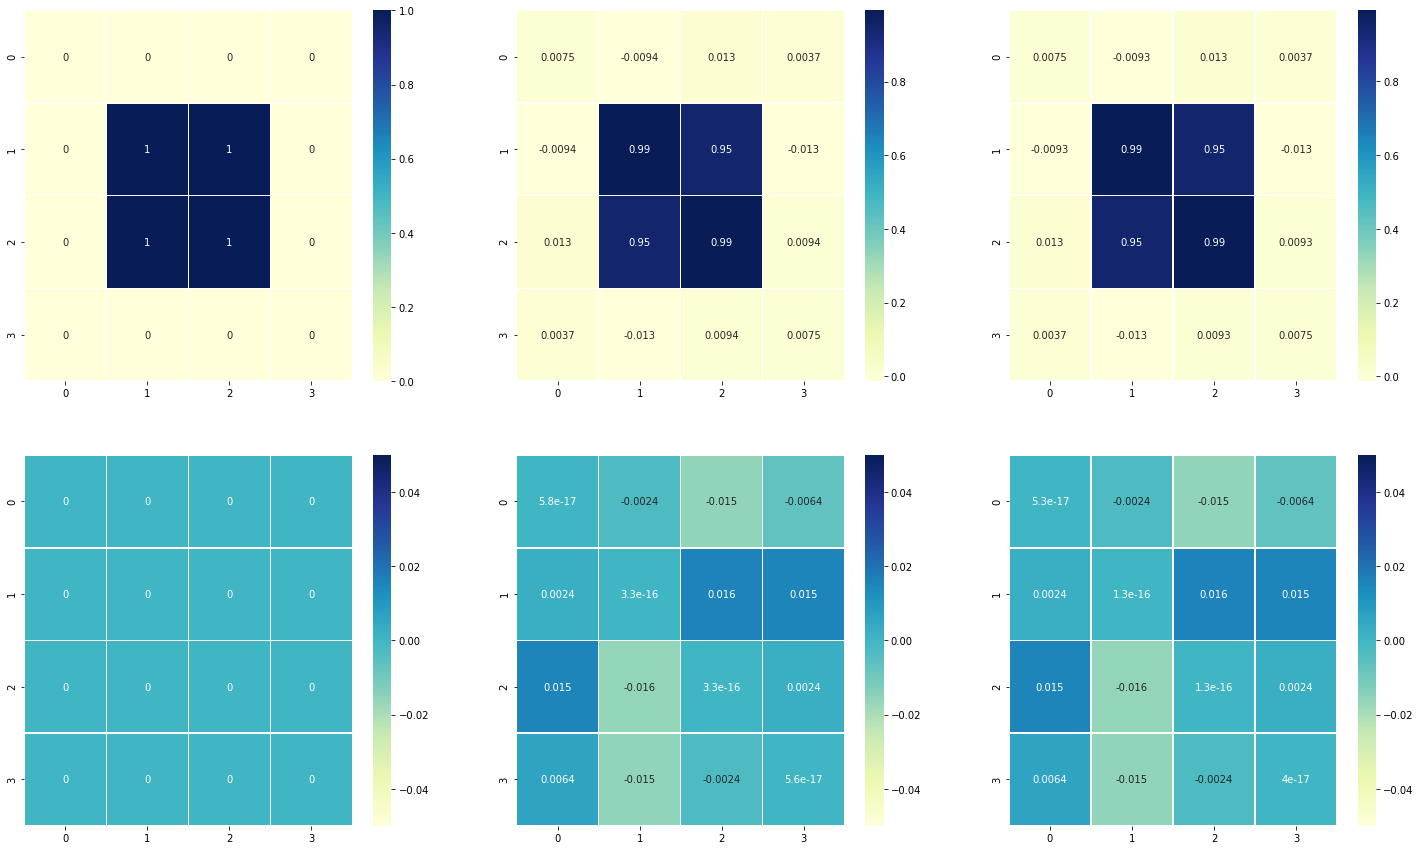

In [8]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)


# ax1.set_title('C_true real part')
# ax2.set_title('C_est_LI real part')
# ax3.set_title('C_est_ML real part')

# ax4.set_title('C_true')


sns.heatmap(np.real(C_true),   annot=True, linewidths=.5, cmap="YlGnBu", ax=ax1)#, vmin=-0.,  vmax = 1)
sns.heatmap(np.real(C_est_LI), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax2)#, vmin=-0.,  vmax = 1,)
sns.heatmap(np.real(C_est_ML), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax3)#, vmin=-0.,  vmax = 1)

sns.heatmap(np.imag(C_true),   annot=True, linewidths=.5, cmap="YlGnBu", ax=ax4, vmin=-0.05, vmax = 0.05)
sns.heatmap(np.imag(C_est_LI), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax5, vmin=-0.05, vmax = 0.05)
sns.heatmap(np.imag(C_est_ML), annot=True, linewidths=.5, cmap="YlGnBu", ax=ax6, vmin=-0.05, vmax = 0.05)

# plt.savefig('recovered_id_channel_matr.pdf', format='pdf', dpi=500)
plt.show()